1: -0.11142587346553352
2: -0.0028328611898017055
3: 0.08309726156751657
4: 0.0
5: -0.08309726156751657
6: 0.0028328611898017055
n:  7
alpha:  0.8
k_s:  1
k_o:  0.1
alpha_prime:  0.1
c_var 0
lamb_val 2.2924316695611777
a [ 1.12372304  1.23723042  1.24858116  1.24858116  1.23723042  1.12372304
 -1.12372304 -1.23723042 -1.24858116 -1.24858116 -1.23723042 -1.12372304]
a_exp [ 1.11425873  1.14258735  1.35387158  1.35387158  1.14258735  1.11425873
 -1.11425873 -1.14258735 -1.35387158 -1.35387158 -1.14258735 -1.11425873
  1.04225685 -1.04225685]
b {1: 1.1142587346553352, 2: 1.1425873465533523, 3: 1.3538715769593956, 4: 1.3538715769593956, 5: 1.1425873465533523, 6: 1.1142587346553352}
c {1: 1.042256846081209}
check_ranks
rank:  0.11237230419977298 rank_mult 0.11237230419977297
rank:  0.011350737797956865 rank_mult 0.011350737797956853
rank:  0.0011350737797956867 rank_mult 0.001135073779795692
rank:  0.0 rank_mult 0.0
rank:  -0.0011350737797956867 rank_mult -0.001135073779795692
rank:  -0.011

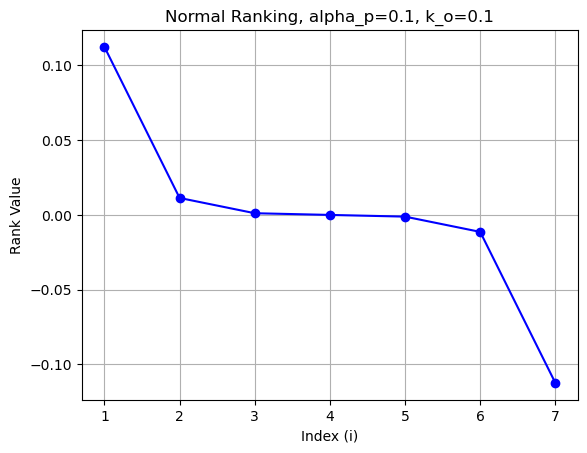

0.11142587346553352
0.0028328611898016786
-0.08309726156751653
-0.0
0.08309726156751653
-0.0028328611898016803
-0.11142587346553352


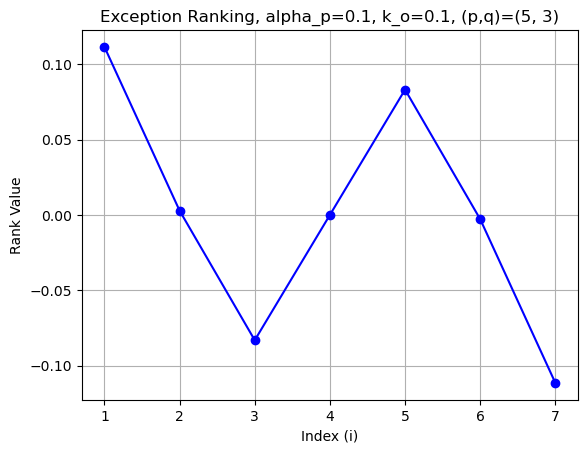

array([ 0.11142587,  0.00283286, -0.08309726, -0.        ,  0.08309726,
       -0.00283286, -0.11142587])

: 

In [3]:
from Dual import Dual
from TI import TI
import numpy as np
import matplotlib.pyplot as plt

n = 7
k_o = 0.1
k_s = 1
k_d = 0
alpha = 1 - (2 * (k_o/k_s))
alpha_prime = k_o/k_s
p = 5
q = 3
c_var = 0
lamb_val = np.arccosh((1+c_var)/(1-alpha))

sim = Dual(n, k_o, k_s, k_d, p, q, c_var)
sim.calc_K()




[1, 2, 3, 4, 5]
[0, 1, 2, 3, 4]


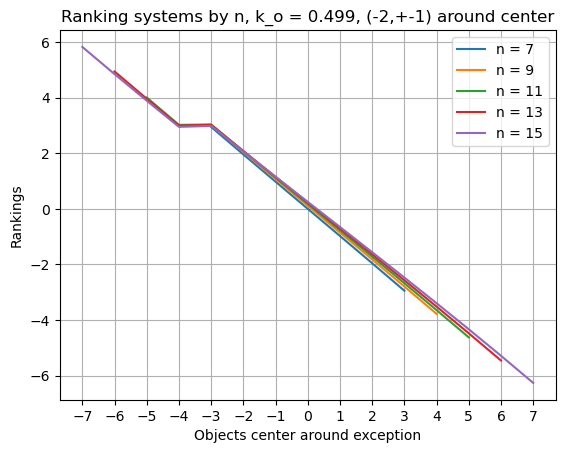

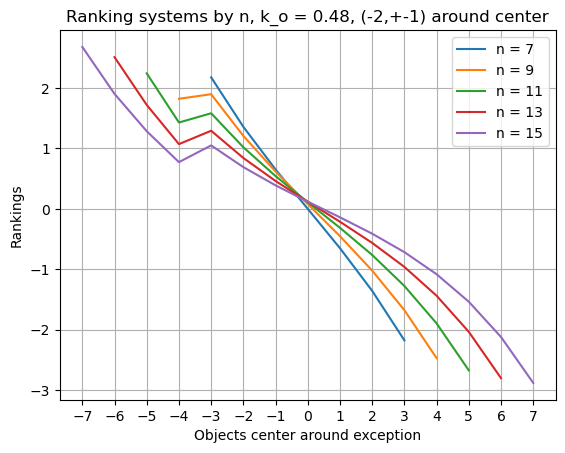

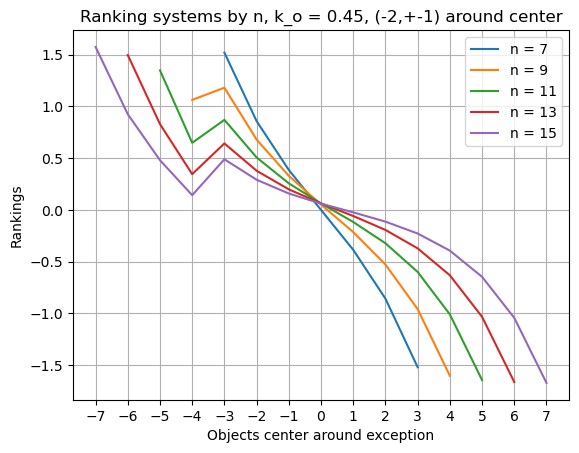

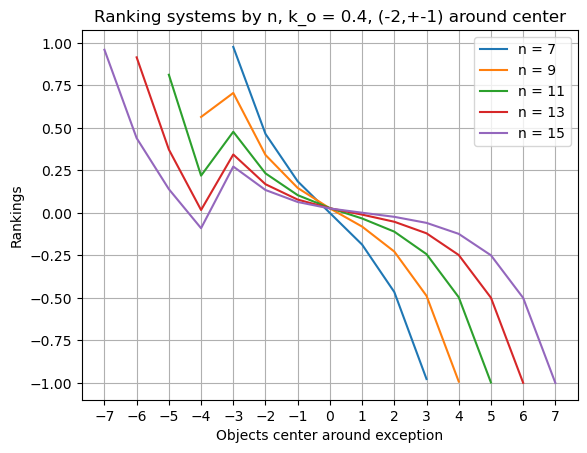

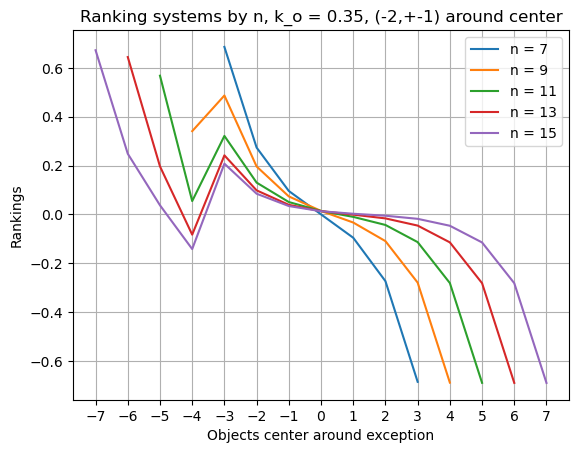

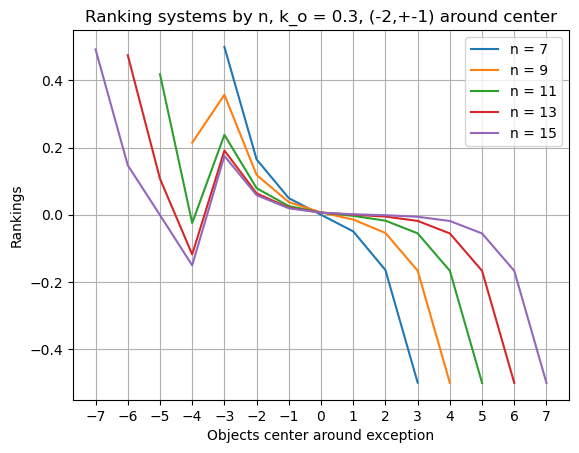

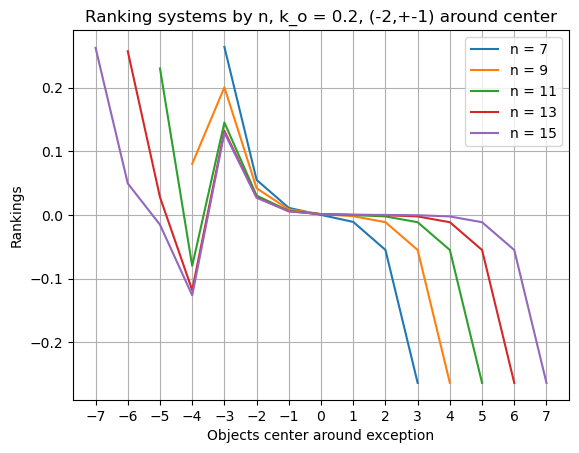

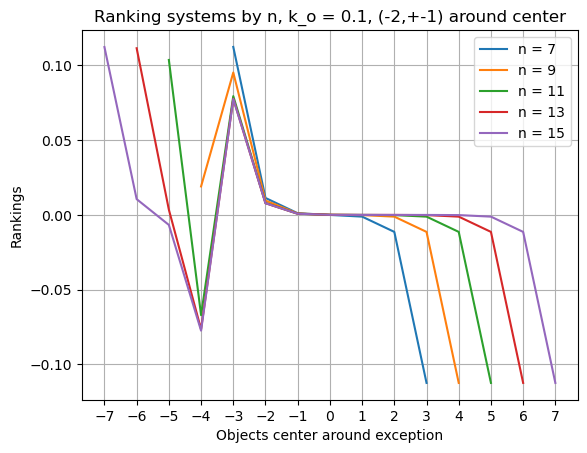

In [19]:
l = 1
r = -2

n_vals = [7,9,11,13,15]
p_vals = [x + r  for x in p_vals]
print(p_vals)
q_vals = [x - l for x in q_vals]
print(q_vals)
k_o_vals = [0.499, 0.48, 0.45, 0.4, 0.35, 0.3, 0.2, 0.1]

for j in range(len(k_o_vals)):
    for i in range(len(n_vals)):
        sim = Ranking_exp(n=n_vals[i], k_o=k_o_vals[j], k_s=1, k_d=0, p=p_vals[i], q=q_vals[i], c_var=0)
        ranks = sim.calc_rank()  # Get rankings for current n
        mid = n_vals[i] // 2  # Midpoint of the ranking system
        x_vals = np.arange(-mid, n_vals[i] - mid)  # Center x-values around 0
        plt.plot(x_vals, ranks, label=f'n = {n_vals[i]}')

    # Add labels and legend
    plt.title(f'Ranking systems by n, k_o = {k_o_vals[j]}, (-{l+1},+{r+1}) around center')
    plt.xlabel('Objects center around exception')
    plt.ylabel('Rankings')

    plt.legend()
    plt.grid(True)
    plt.xticks(np.arange(min(x_vals), max(x_vals) + 1, 1))  # X-axis ticks every 1

    # Show the plot
    plt.show()